In [51]:
import joblib
import numpy as np
import glob
from importlib import reload
from PIL import Image
import msi_visual
from msi_visual import nmf_segmentation, kmeans_segmentation
reload(nmf_segmentation)
reload(kmeans_segmentation)

paths = glob.glob("D:\maldi\slides\slide2_notol_5_bin\\*.npy")
paths = [paths[0]]
seg = kmeans_segmentation.KmeansSegmentation(k=5, normalization='tic', start_bin=0, end_bin=5005)
images = [np.load(p)[::2, ::2, :] for p in paths]
seg.fit(images)

joblib.dump(seg, "models/slide2_timson_15.joblib")

(5, 18733) similarity


['models/slide2_timson_15.joblib']

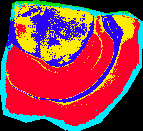

In [52]:
seg = joblib.load(open("models/slide2_timson_15.joblib", "rb"))
for img in seg.visualize_training_components(images):
    display(Image.fromarray(img))

(100, 262, 286) [2.25643106e-02 4.03344585e-03 3.50263640e-02 3.68090423e-06
 2.40648771e-03 5.60867181e-03 5.35434633e-02 3.03952359e-02
 2.71354374e-02 4.30494845e-02 8.27747863e-04 5.02503328e-02
 1.53266665e-23 2.11541541e-02 6.58261450e-03 3.32550099e-03
 4.64376062e-03 9.66971449e-04 1.00728736e-04 3.34181350e-05
 8.13514052e-04 2.31347559e-03 1.08387889e-02 3.71917598e-02
 7.38729611e-18 2.31183483e-03 1.37480500e-03 1.45333586e-03
 1.77536032e-03 1.91522725e-02 4.83828261e-02 8.14722572e-03
 1.32769160e-03 5.37208188e-03 7.22614164e-03 2.82351137e-03
 2.08254624e-03 4.53816966e-07 1.47753523e-03 2.00004820e-02
 1.52110867e-03 2.32033408e-03 2.28351328e-05 5.86979650e-02
 8.40552524e-03 3.24392281e-02 1.59612335e-02 4.34296578e-03
 7.43753916e-19 3.16647515e-06 1.17953168e-03 2.13994179e-03
 8.44283088e-04 1.41355293e-02 3.30768735e-03 1.36668234e-06
 6.69528544e-03 9.89068858e-03 8.44621751e-03 6.19864615e-04
 6.87084021e-03 2.14536092e-03 3.26420590e-02 3.30627430e-03
 1.41332

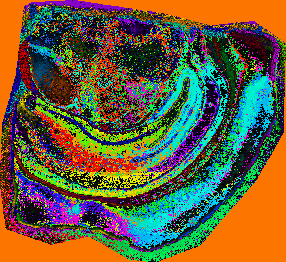

In [46]:
for path in paths:
    mask, viz = seg.predict(np.load(path), method='spatial_norm')
    display(Image.fromarray(viz))